# 10장 딥러닝 모델 설계하기  (2장 딥러닝의 핵심 미리 보기)

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch10-colab.ipynb)

### 1. 환경 준비 

In [2]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense   

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [3]:
# 깃허브에 준비된 데이터를 가져옵니다.
# !git clone https://github.com/taehojo/data.git   

# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("data/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:,0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

In [4]:
X.shape, X

((470, 16),
 array([[ 1.  ,  2.88,  2.16, ...,  1.  ,  0.  , 60.  ],
        [ 2.  ,  3.4 ,  1.88, ...,  1.  ,  0.  , 51.  ],
        [ 2.  ,  2.76,  2.08, ...,  1.  ,  0.  , 59.  ],
        ...,
        [ 2.  ,  3.04,  2.08, ...,  0.  ,  0.  , 52.  ],
        [ 2.  ,  1.96,  1.68, ...,  1.  ,  0.  , 79.  ],
        [ 2.  ,  4.72,  3.56, ...,  1.  ,  0.  , 51.  ]]))

### 3. 구조 결정 

In [ ]:
# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()                                                   
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# from tensorflow.keras.layers import Input
# model = Sequential([
#     Input(shape=(16,)),
#     Dense(30, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

### 4. 모델 실행 

In [ ]:
# 딥러닝 모델을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(X, y, epochs=5, batch_size=16)

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
model.predict(X)

In [ ]:
## Parameter Set : weights
w = model.get_weights()
w

In [ ]:
len(w)

In [ ]:
w[0].shape

In [ ]:
w[1].shape

In [ ]:
w[2].shape

In [ ]:
w[3].shape

https://velog.io/@hjk1996/Cross-Entropy%EC%99%80-Softmax%EC%9D%98-%EB%AF%B8%EB%B6%84

In [ ]:
####################################################################
# 폐암환자 예제 (2진분류) : numpy로 구현
#####################################################################
import numpy as np

# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("../data/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:, 0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:, [16]]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

# 시그모이드 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(y):
    return y * (1 - y)


# 하이퍼파라미터
learning_rate = 0.001
np.random.seed(0)

# 가중치와 바이어스 초기화
# 입력층 -> 첫 번째 히든 레이어 (16 -> 30)
W1 = np.random.randn(16, 30)
b1 = np.random.randn(30)
# 첫 번째 히든 레이어 -> 두 번째 히든 레이어 (30 -> 8)
W2 = np.random.randn(30, 8)
b2 = np.random.randn(8)
# 두 번째 히든 레이어 -> 출력층 (8 -> 1)
W3 = np.random.randn(8, 1)
b3 = np.random.randn(1)
cost_list = []
accuracy_list = []

# 훈련
for step in range(101):
    # Forward propagation
    layer1 = sigmoid(np.dot(X, W1) + b1)  # 첫 번째 히든 레이어
    layer2 = sigmoid(np.dot(layer1, W2) + b2)  # 두 번째 히든 레이어
    hypothesis = sigmoid(np.dot(layer2, W3) + b3)  # 출력층
    predicted = (hypothesis > 0.5).astype(np.float32)
    accuracy = np.mean(predicted == y)

    # 비용 함수 계산 (Binary Cross-Entropy)
    cost = -np.mean(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))
    
    cost_list.append(cost)    
    accuracy_list.append(accuracy)
    
    # Backward propagation
    # 출력층 에러
    error = hypothesis - y    # 예측값과 실제값의 차이
    d_hypothesis = error * sigmoid_derivative(hypothesis)
    
    # 두 번째 히든 레이어 에러
    layer2_error = np.dot(d_hypothesis, W3.T)
    d_layer2 = layer2_error * sigmoid_derivative(layer2)
    
    # 첫 번째 히든 레이어 에러
    layer1_error = np.dot(d_layer2, W2.T)
    d_layer1 = layer1_error * sigmoid_derivative(layer1)
    
    # 가중치와 바이어스 업데이트
    W3 -= learning_rate * np.dot(layer2.T, d_hypothesis)
    b3 -= learning_rate * np.sum(d_hypothesis, axis=0)
    W2 -= learning_rate * np.dot(layer1.T, d_layer2)
    b2 -= learning_rate * np.sum(d_layer2, axis=0)
    W1 -= learning_rate * np.dot(X.T, d_layer1)
    b1 -= learning_rate * np.sum(d_layer1, axis=0)
    
    # 출력
    if step % 100 == 0:
        print(step, cost, W3.flatten())

# 최종 결과
layer1 = sigmoid(np.dot(X, W1) + b1)
layer2 = sigmoid(np.dot(layer1, W2) + b2)
hypothesis = sigmoid(np.dot(layer2, W3) + b3)
predicted = (hypothesis > 0.5).astype(np.float32)
accuracy = np.mean(predicted == y)

print("\nHypothesis:\n", hypothesis)
print("\nCorrect:\n", predicted)
print("\nAccuracy:\n", accuracy)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_list)

In [ ]:
plt.plot(accuracy_list)

In [ ]:
from tensorflow.keras.optimizers import *

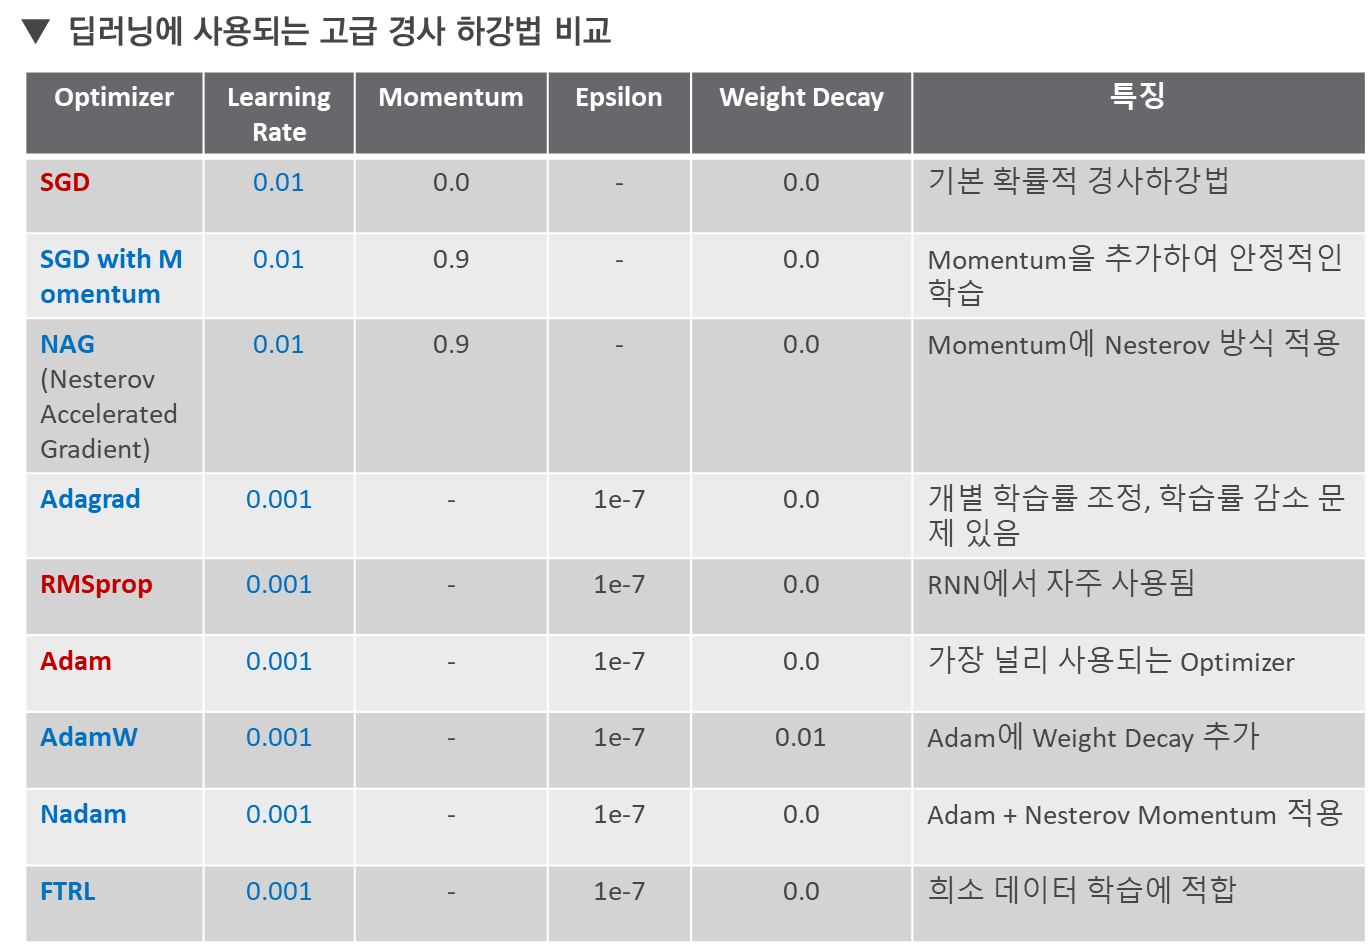  
  
* **learning_rate (학습률)** : 기본적으로 0.001 ~ 0.01 사용. 높은 경우 빠른 학습, 낮은 경우 안정적인 학습 가능.
* **momentum (모멘텀)** : 이전 그래디언트를 고려하여 진동을 줄이고 수렴 속도를 높임. (SGD + Momentum, NAG에서 사용)
* **epsilon** : 0으로 나누는 문제를 방지하기 위한 작은 값 (보통 1e-7)
* **weight_decay**: 가중치 감쇠로 과적합 방지 (AdamW에서 기본값 0.01)  
  
★ Adam이 기본적으로 가장 많이 사용되지만, 특정 상황에서는 AdamW, RMSprop, SGD with Momentum이 더 적합할 수 있음.  

* RNN 계열에서는 RMSprop, Adam을 많이 사용하며, 희소 데이터에서는 FTRL이 적합함.



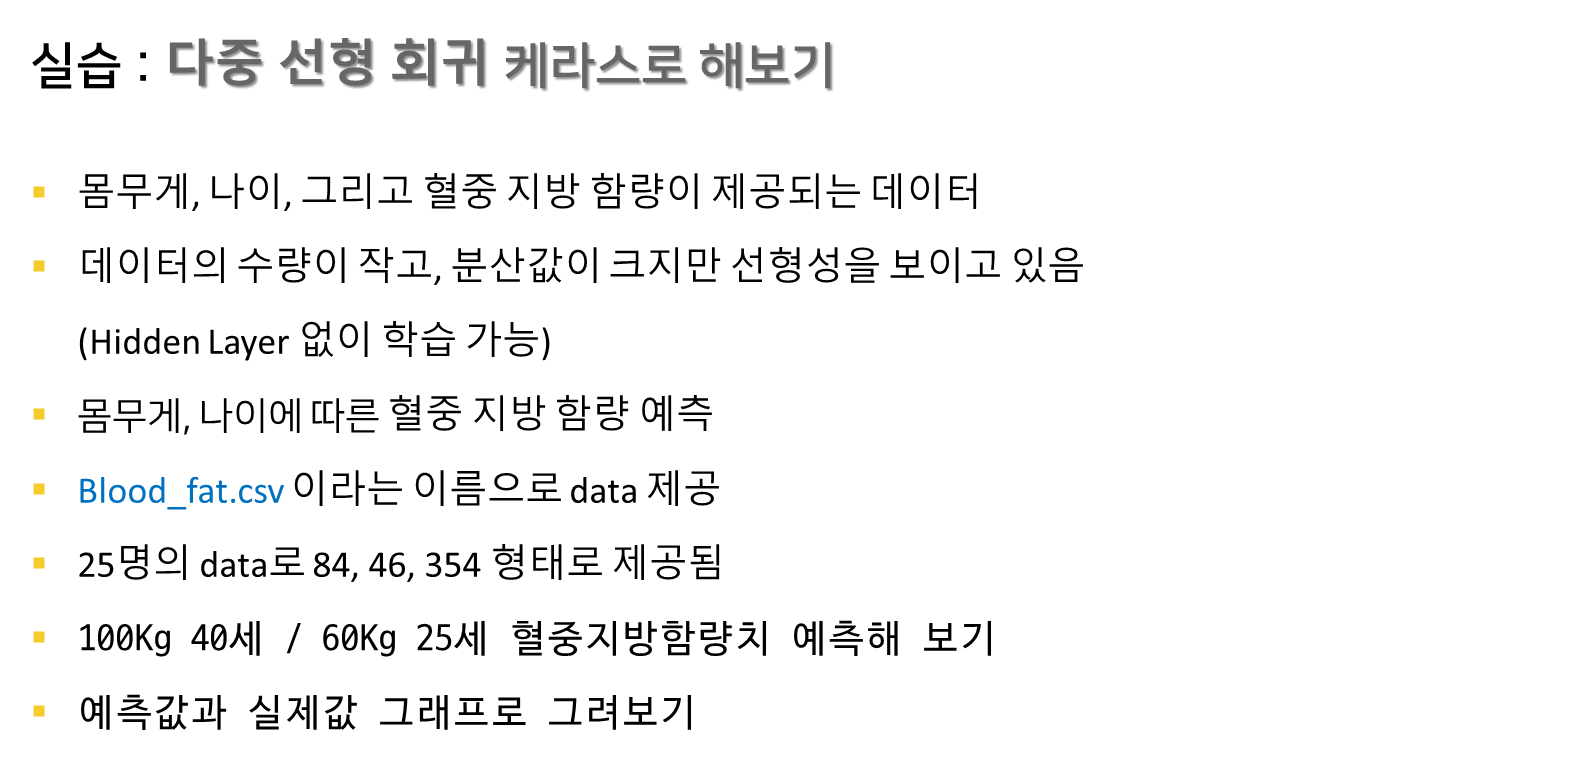

In [ ]:
###################################################
# Keras : 다중 선형회귀 (Bloodfat 예제)
###################################################
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# x_data = np.array(data[:, 0:2], dtype=np.float32)
# y_data = np.array(data[:, 2], dtype=np.float32)
# y_data = y_data.reshape((25, 1))
df = pd.read_csv('../data/Blood_fat.csv', header=None, 
                 names=['몸무게', '나이', '혈당'], dtype='f')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

#예측 Data
# ax.scatter(x, y, Z)
#실제 Data
# ax.scatter(xs, ys, zs)  #ax.scatter을 통해 필요한 data를 계속 표시 가능
ax.scatter(df['몸무게'], df['나이'], df['혈당'],
           s=150, c='b')  #ax.scatter을 통해 필요한 data를 계속 표시 가능
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
# rmsprop = RMSprop(learning_rate=0.01)
# model.compile(loss='mse', optimizer=rmsprop)
model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.01))
# model.compile(loss='mse', optimizer='adam')
model.summary()

history = model.fit(X, Y, epochs=1000)

In [ ]:
pd.DataFrame(history.history['loss']).plot()
# plt.ylim([0, 5000])

In [ ]:
model.predict(X[:5])

In [ ]:

print(history.history.keys())
print("100Kg 40세 혈중지방함량치=", model.predict(np.array([100, 40]).reshape(1, 2)))
print("60Kg 25세 혈중지방함량치=", model.predict(np.array([60, 25]).reshape(1, 2)))
W_, b_ = model.get_weights()
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

print("x=", x.shape)
print("y=", y.shape)

#Numpy 배열들을 하나로 합치는데 이용
#나이와 몸무게를 하나의 2차원 배열로 만듦
X = np.concatenate((x, y), axis=1)
print("X=", X.shape)

#예측치
Z = np.matmul(X, W_) + b_
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

#예측 Data
ax.scatter(x, y, Z, c="r")
#실제 Data
ax.scatter(df['몸무게'], df['나이'], df['혈당'],
           s=150, c='b')  #ax.scatter을 통해 필요한 data를 계속 표시 가능
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [ ]:
###################################################
# Keras : 다중 선형회귀 (Bloodfat 예제)
###################################################

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

raw_data = np.loadtxt("../data/Blood_fat.csv", delimiter=",")
xs = np.array(raw_data[:, 0], dtype=np.float32)
ys = np.array(raw_data[:, 1], dtype=np.float32)
zs = np.array(raw_data[:, 2], dtype=np.float32)
x_data = np.array(raw_data[:, 0:2], dtype=np.float32)
y_data = np.array(raw_data[:, 2], dtype=np.float32)
y_data = y_data.reshape((25, 1))

rmsprop = RMSprop(learning_rate=0.01)
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss='mse', optimizer=rmsprop)
model.summary()

hist = model.fit(x_data, y_data, epochs=1000)

print(hist.history.keys())
print("100Kg 40세 혈중지방함량치=", model.predict(np.array([100, 40]).reshape(1, 2)))
print("60Kg 25세 혈중지방함량치=", model.predict(np.array([60, 25]).reshape(1, 2)))
W_, b_ = model.get_weights()
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

print("x=", x.shape)
print("y=", y.shape)

#Numpy 배열들을 하나로 합치는데 이용
#나이와 몸무게를 하나의 2차원 배열로 만듦
X = np.concatenate((x, y), axis=1)
print("X=", X.shape)

#예측치
Z = np.matmul(X, W_) + b_
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

#예측 Data
ax.scatter(x, y, Z)
#실제 Data
ax.scatter(xs, ys, zs)  #ax.scatter을 통해 필요한 data를 계속 표시 가능
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [ ]:
model.weights